In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv('/kaggle/input/carprice/CarPrice.csv')


In [20]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [21]:
df.shape

(205, 26)

In [22]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
146,147,0,subaru trezia,gas,std,four,wagon,fwd,front,97.0,173.5,65.4,53.0,2290,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,28,32,7463.0
168,169,2,toyota corolla,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,52.0,2536,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0
37,38,0,honda accord,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.0


In [24]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [26]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [27]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [28]:
df.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [29]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
32,33,1,honda civic,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
10,11,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0
148,149,0,subaru dl,gas,std,four,wagon,4wd,front,96.9,173.6,65.4,54.9,2420,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013.0


**Data Cleaning**

In [30]:
df['Company Name']  = df['CarName'].apply(lambda x : x.split()[0])

In [31]:
df.drop('CarName',axis = 1, inplace= True)

In [32]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [34]:
df['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [36]:
def replace(error,correct):
    df['Company Name'] = df['Company Name'].replace(to_replace=error,value=correct)

In [38]:
replace('maxda','mazda')
replace('porcshce','porsche')
replace('Nissan','nissan')
replace('vw','volkswagen')
replace('vokswagen','volkswagen')
replace('toyouta','toyota')

In [39]:
df['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [43]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Company Name'],
      dtype='object')

In [44]:
df.sample(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name
109,0,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3230,l,four,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0,peugeot
141,0,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2145,ohcf,four,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126.0,subaru
189,3,gas,std,two,convertible,fwd,front,94.5,159.3,64.2,55.6,2254,ohc,four,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595.0,volkswagen
106,1,gas,std,two,hatchback,rwd,front,99.2,178.5,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,9.0,160,5200,19,25,18399.0,nissan
151,1,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0,toyota


**Data visualization**

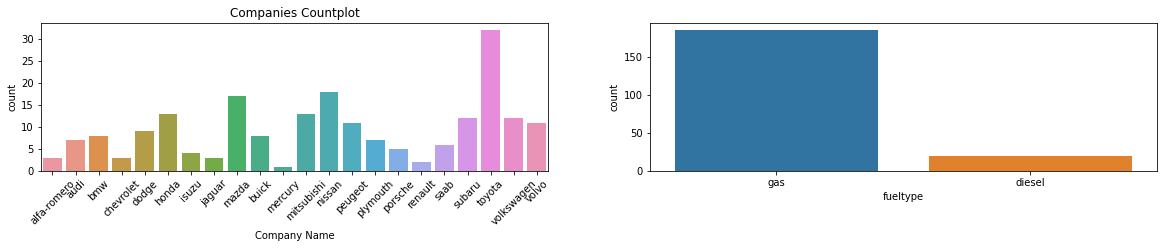

In [47]:
plt.figure(figsize=(20, 6))

plt.subplot(2,2,1)
plt1 = sns.countplot(x='Company Name',data = df)
plt.title('Companies Countplot')
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
plt.subplot(2,2,2)
plt2 = sns.countplot(x='fueltype',data = df)

<AxesSubplot:xlabel='price'>

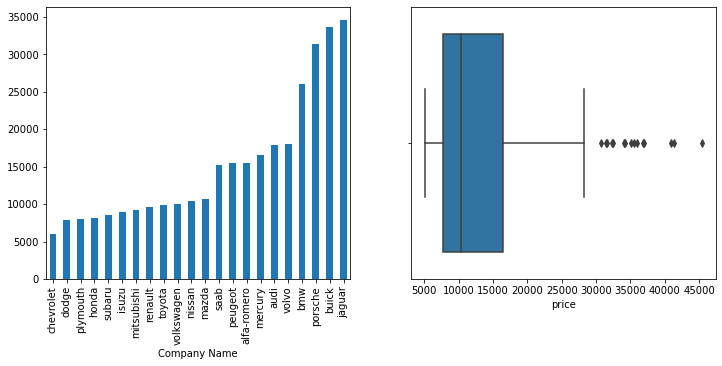

In [48]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
df.groupby('Company Name').mean()['price'].sort_values().plot(kind = 'bar')

plt.subplot(1,2,2)
sns.boxplot(x='price',data = df)

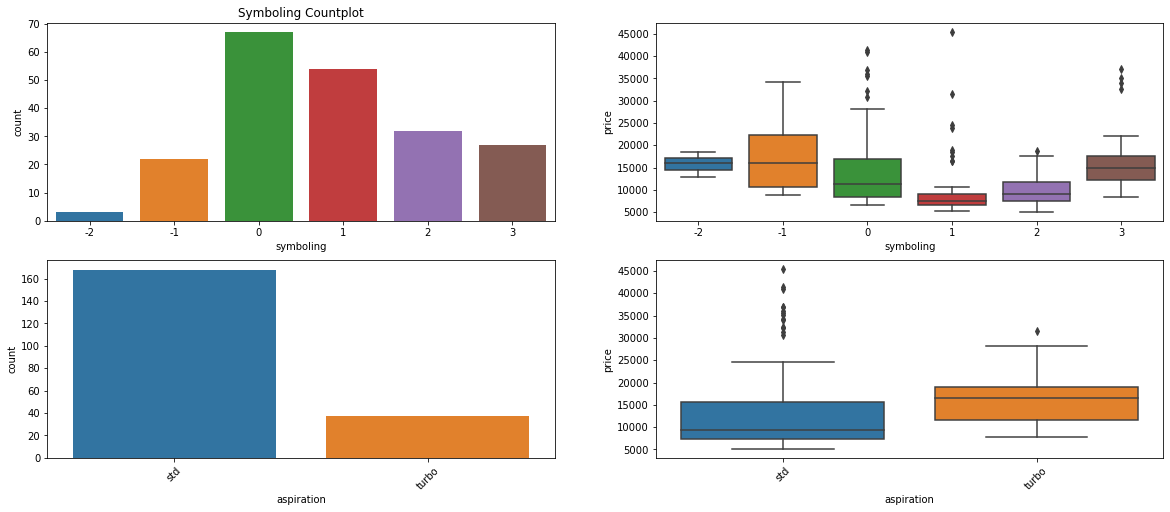

In [50]:
plt.figure(figsize=(20, 8))

plt.subplot(2,2,1)
sns.countplot(x='symboling',data = df)
plt.title('Symboling Countplot')

plt.subplot(2,2,3)
sns.countplot(x='aspiration',data = df)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

plt.subplot(2,2,2)
plt1 = sns.boxplot(x='symboling',y='price',data = df)

plt.subplot(2,2,4)
plt2 = sns.boxplot(x='aspiration',y='price',data = df)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)

<AxesSubplot:xlabel='Company Name', ylabel='price'>

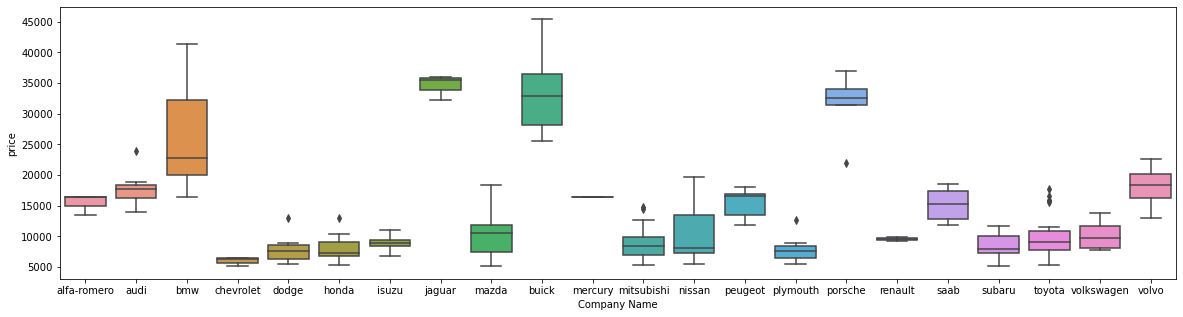

In [51]:
plt.figure(figsize = (20,5))
sns.boxplot(x='Company Name',y = 'price',data = df)

In [52]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

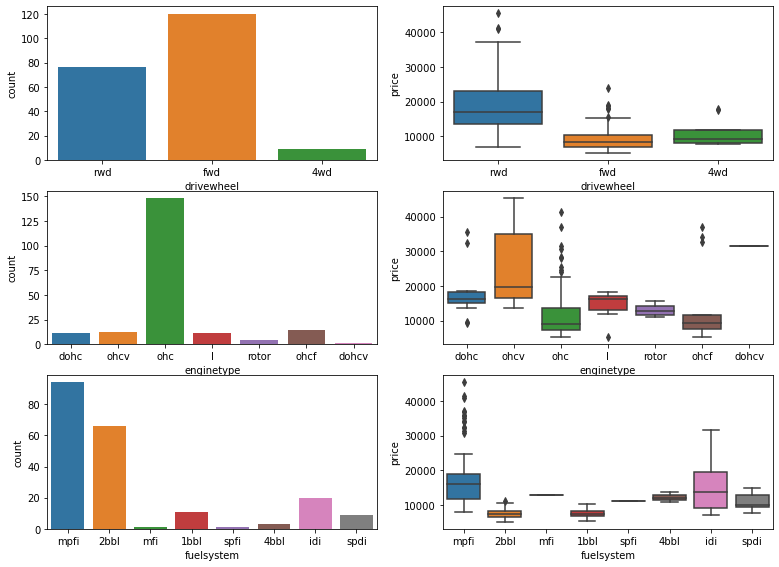

In [53]:
plt.figure(figsize=(13, 13))

plt.subplot(4,2,1)
sns.countplot(x='drivewheel',data = df)
plt.subplot(4,2,2)
sns.boxplot(x='drivewheel',y='price',data = df)
plt.subplot(4,2,3)
sns.countplot(x='enginetype',data = df)

plt.subplot(4,2,4)
sns.boxplot(x='enginetype',y='price',data = df)

plt.subplot(4,2,5)
sns.countplot(x='fuelsystem',data = df)
plt.subplot(4,2,6)
plt1 = sns.boxplot(x='fuelsystem',y='price',data = df)

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

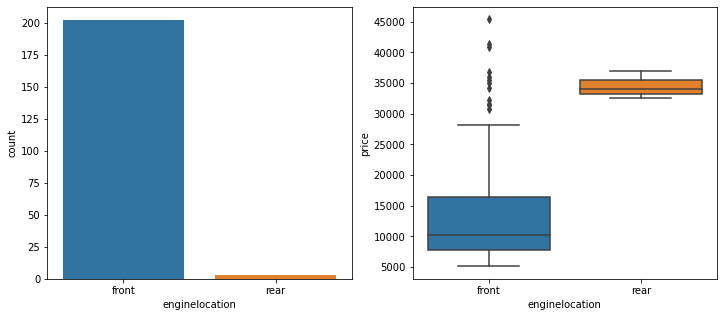

In [54]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(x='enginelocation',data = df)
plt.subplot(1,2,2)
sns.boxplot(x='enginelocation',y='price',data = df)


In [55]:
df.corr()['price'].index

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [56]:
df.corr()['price']

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

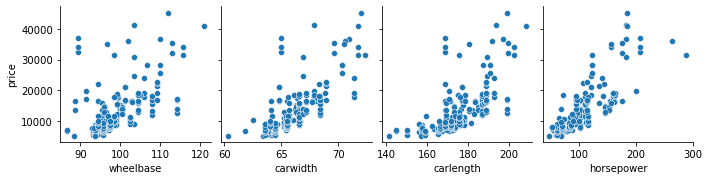

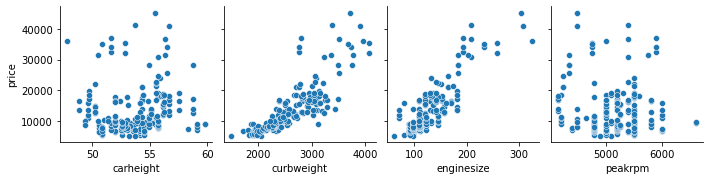

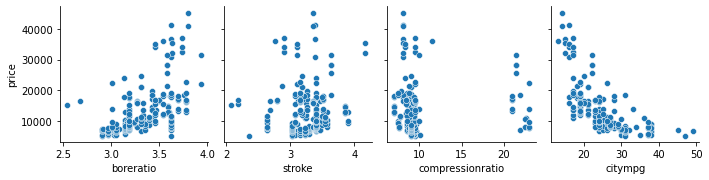

In [57]:
sns.pairplot(x_vars = ['wheelbase','carwidth','carlength','horsepower'],y_vars = ['price'],data = df)
sns.pairplot(x_vars = ['carheight','curbweight','enginesize','peakrpm'],y_vars = ['price'],data = df)
sns.pairplot(x_vars = ['boreratio','stroke','compressionratio','citympg'],y_vars = ['price'],data = df)

<AxesSubplot:>

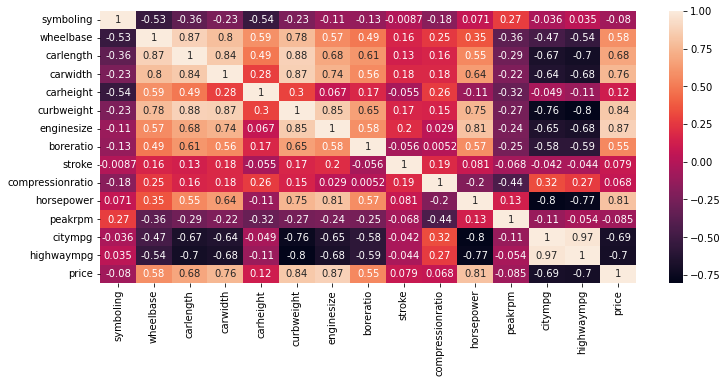

In [59]:
plt.figure(figsize = (12,5))
sns.heatmap(df.corr(),annot = True)

In [60]:
imp = df[['carwidth','curbweight','enginesize','boreratio','horsepower','highwaympg','citympg','wheelbase']]

In [61]:
imp.corr()

,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,citympg,wheelbase
carwidth,1.000000,0.867032,0.735433,0.559150,0.640732,-0.677218,-0.642704,0.795144
curbweight,0.867032,1.000000,0.850594,0.648480,0.750739,-0.797465,-0.757414,0.776386
enginesize,0.735433,0.850594,1.000000,0.583774,0.809769,-0.677470,-0.653658,0.569329
boreratio,0.559150,0.648480,0.583774,1.000000,0.573677,-0.587012,-0.584532,0.488750
horsepower,0.640732,0.750739,0.809769,0.573677,1.000000,-0.770544,-0.801456,0.353294
highwaympg,-0.677218,-0.797465,-0.677470,-0.587012,-0.770544,1.000000,0.971337,-0.544082
citympg,-0.642704,-0.757414,-0.653658,-0.584532,-0.801456,0.971337,1.000000,-0.470414
wheelbase,0.795144,0.776386,0.569329,0.488750,0.353294,-0.544082,-0.470414,1.000000


In [62]:
imp = imp.drop('citympg',axis = 1)
num_imp_cols = imp.columns
num_imp_cols

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'highwaympg', 'wheelbase'],
      dtype='object')

In [66]:
num_imp_cols = list(num_imp_cols)


In [74]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [75]:
df.corr()['price']

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [76]:
num_imp_cols.append('cylindernumber')

In [78]:
num_imp_cols.append('price')

**Dummy Variables**

In [80]:
fueltype = pd.get_dummies(df['fueltype'],drop_first=True)
aspiration = pd.get_dummies(df['aspiration'],drop_first=True)
carbody = pd.get_dummies(df['carbody'],drop_first=True)
drivewheel = pd.get_dummies(df['drivewheel'],drop_first=True)
enginelocation = pd.get_dummies(df['enginelocation'],drop_first=True)
fuelsystem = pd.get_dummies(df['fuelsystem'],drop_first=True)
CompanyName = pd.get_dummies(df['Company Name'],drop_first=True)
enginetype = pd.get_dummies(df['enginetype'],drop_first=True)

In [81]:
df= df[num_imp_cols]

In [82]:
df.head()

,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,wheelbase,cylindernumber,price,price
0,64.1,2548,130,3.47,111,27,88.6,four,13495.0,13495.0
1,64.1,2548,130,3.47,111,27,88.6,four,16500.0,16500.0
2,65.5,2823,152,2.68,154,26,94.5,six,16500.0,16500.0
3,66.2,2337,109,3.19,102,30,99.8,four,13950.0,13950.0
4,66.4,2824,136,3.19,115,22,99.4,five,17450.0,17450.0


In [83]:
df = pd.concat([df,fueltype,aspiration,carbody,drivewheel,enginelocation,fuelsystem,enginetype,CompanyName],axis = 1)

In [84]:
df.head()

,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,wheelbase,cylindernumber,price,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,64.1,2548,130,3.47,111,27,88.6,four,13495.0,13495.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,64.1,2548,130,3.47,111,27,88.6,four,16500.0,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,65.5,2823,152,2.68,154,26,94.5,six,16500.0,16500.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,66.2,2337,109,3.19,102,30,99.8,four,13950.0,13950.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,66.4,2824,136,3.19,115,22,99.4,five,17450.0,17450.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.model_selection import train_test_split


In [88]:
X = df.drop('price',axis = 1)
y = df['price']

In [89]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [90]:
df_train.shape

(143, 53)

In [91]:
df_test.shape

(62, 53)

In [95]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler



In [97]:
scaler = StandardScaler()



In [100]:
df_train.head()



,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,wheelbase,cylindernumber,price,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,63.8,2191,98,2.97,68,38,93.7,four,7609.0,7609.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,68.3,2778,151,3.94,143,27,94.5,four,22018.0,22018.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,64.0,2300,98,3.24,112,29,94.5,four,9538.0,9538.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,64.1,2548,130,3.47,111,27,88.6,four,16500.0,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,67.2,3157,130,3.62,162,22,104.3,four,18950.0,18950.0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [103]:
X_train,y_train = df_train.drop('price',axis = 1),df_train['price']

In [105]:
df_test.head()


,carwidth,curbweight,enginesize,boreratio,horsepower,highwaympg,wheelbase,cylindernumber,price,price,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
160,64.4,2094,98,3.19,70,47,95.7,four,7738.0,7738.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,65.5,2275,109,3.19,85,34,97.3,four,8495.0,8495.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,66.5,2385,122,3.39,84,32,98.8,four,8845.0,8845.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,64.0,2265,98,3.24,112,29,94.5,four,9298.0,9298.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,63.8,2240,108,3.62,73,31,93.3,four,7603.0,7603.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [106]:
X_test = df_test.drop('price',axis = 1)
y_test = df_test['price']

**Tuning the svm model**

In [111]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [123]:

from sklearn.model_selection import GridSearchCV


In [ ]:


grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
#Residual Analysis
fig = plt.figure()
sns.displot((y_test - y_pred),bins = 30,kde= True)
fig.suptitle('Error Terms')       
plt.xlabel('Errors')   

In [ ]:
#EVALUATION OF THE MODEL
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)          
plt.xlabel('y_test')                        
plt.ylabel('y_pred') 